Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257


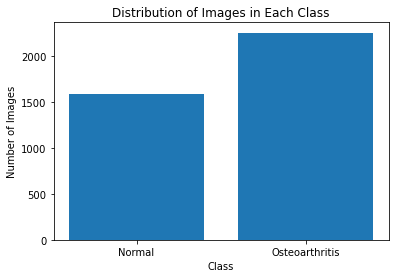

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Create a histogram to visualize the distribution of images in each class
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


2024-03-24 15:24:14.595545: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 15:24:14.849997: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-24 15:24:14.850111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-24 15:24:14.888961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-24 15:24:14.968949: I tensorflow/core/platform/cpu_feature_guar

Number of images in Normal class: 1589
Number of images in Osteoarthritis class: 2257
Number of images in Normal class after augmentation: 2257


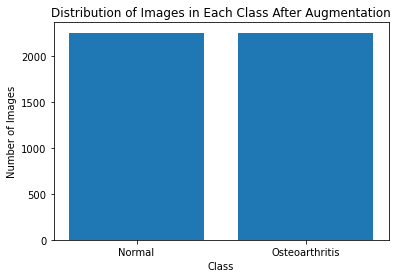

In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define a function to load and resize images from a folder
def load_and_resize_images_from_folder(folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, target_size)
            images.append(img)
    return images

# Load images from directories for each class
normal_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Normal')
osteoarthritis_images = load_and_resize_images_from_folder('/home/lab5/ML2/OsteoArthritis-20240311T154242Z-001/OsteoArthritis/Osteoarthritis')

# Display the number of images in each class
print("Number of images in Normal class:", len(normal_images))
print("Number of images in Osteoarthritis class:", len(osteoarthritis_images))

# Check if data augmentation is needed
if len(normal_images) < len(osteoarthritis_images):
    # Calculate the number of additional images needed
    num_additional_images = len(osteoarthritis_images) - len(normal_images)

    # Create an ImageDataGenerator for data augmentation
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Choose random indices from the "Normal" class for augmentation
    sampled_indices = np.random.randint(0, len(normal_images), size=num_additional_images)

    # Perform data augmentation and append augmented images to the "Normal" class
    for index in sampled_indices:
        img = normal_images[index]
        img = img.reshape((1,) + img.shape)  # Reshape for flow() function
        for batch in datagen.flow(img, batch_size=1):
            normal_images.append(batch[0])  # Append augmented images
            break  # Exit the loop after one iteration of data augmentation

    # Display the number of images in the "Normal" class after augmentation
    print("Number of images in Normal class after augmentation:", len(normal_images))

# Create a histogram to visualize the distribution of images in each class after augmentation
plt.bar(['Normal', 'Osteoarthritis'], [len(normal_images), len(osteoarthritis_images)])
plt.title('Distribution of Images in Each Class After Augmentation')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


In [3]:
import random

# Set a seed for reproducibility
random.seed(42)

# Randomly select 1000 images from each class
selected_normal_images = random.sample(normal_images, 1500)
selected_osteoarthritis_images = random.sample(osteoarthritis_images, 1500)

# Combine selected images from both classes
selected_images = selected_normal_images + selected_osteoarthritis_images
labels = [0] * 1500 + [1] * 1500  # Assign labels (0 for Normal, 1 for Osteoarthritis)

# Split the selected images and labels into train and test sets (70:30 ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_images, labels, test_size=0.3, random_state=42)

# Split the train set into train and validation sets (80:20 ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the sizes of train, test, and validation sets
print("X_train size:", len(X_train))
print("X_test size:", len(X_test))
print("X_validation size:", len(X_val))


X_train size: 1680
X_test size: 900
X_validation size: 420


In [4]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score,balanced_accuracy_score,matthews_corrcoef

VGG16

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define a function to preprocess images
def preprocess_images(images):
    processed_images = []
    for img in images:
        # Resize image to (224, 224)
        resized_img = cv2.resize(img, (224, 224))
        # Convert the image to array and apply preprocessing specific to VGG16
        processed_img = preprocess_input(resized_img)
        processed_images.append(processed_img)
    return np.array(processed_images)
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)
# Preprocess train, validation, and test images
X_train_preprocessed = preprocess_images(X_train)
X_val_preprocessed = preprocess_images(X_val)
X_test_preprocessed = preprocess_images(X_test)


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 70s 1s/step - loss: 0.6359 - accuracy: 0.6506 - val_loss: 0.5741 - val_accuracy: 0.6952
Epoch 2/50
53/53 [==============================] - 79s 1s/step - loss: 0.4931 - accuracy: 0.7577 - val_loss: 0.5023 - val_accuracy: 0.7548
Epoch 3/50
53/53 [==============================] - 80s 2s/step - loss: 0.4352 - accuracy: 0.8042 - val_loss: 0.4663 - val_accuracy: 0.7810
Epoch 4/50
53/53 [==============================] - 80s 2s/step - loss: 0.4020 - accuracy: 0.8173 - val_loss: 0.4417 - val_accuracy: 0.7857
Epoch 5/50
53/53 [==============================] - 80s 2s/step - loss: 0.3809 - accuracy: 0.8280 - val_loss: 0.4298 - val_accuracy: 0.7881
Epoch 6/50
53/53 [==============================] - 80s 2s/step - loss: 0.3523 - accuracy: 0.8452 - val_loss: 0.4267 - val_accuracy: 0.8095
Epoch 7/50
53/53 [==============================] - 80s 2s/step - loss: 0.3397 - accuracy: 0.8607 - val_loss: 0.4075 - val_accuracy: 0.8167
Epoch 8/50
53/53 [==

In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 27s 920ms/step


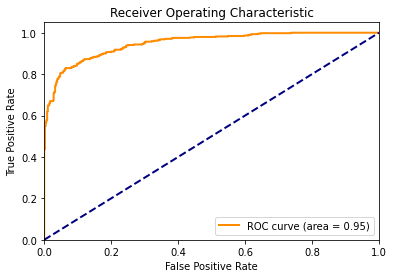

14/14 [==============================] - 14s 1s/step
Test Loss: 0.28553237267236087
Validation Loss: 0.3633390654360941
Training Time (seconds): 2878.156411886215
Inference Time (seconds): 27.129523754119873
Validation Accuracy: 0.85
Test Accuracy: 0.8755555555555555
Confusion Matrix:
 [[405  56]
 [ 56 383]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       461
           1       0.87      0.87      0.87       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.9489843313782557
Metrics saved successfully


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [13]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 75s 1s/step - loss: 0.1737 - accuracy: 0.9470 - val_loss: 0.3641 - val_accuracy: 0.8548
Epoch 2/100
53/53 [==============================] - 80s 2s/step - loss: 0.1687 - accuracy: 0.9470 - val_loss: 0.3632 - val_accuracy: 0.8500
Epoch 3/100
53/53 [==============================] - 80s 2s/step - loss: 0.1650 - accuracy: 0.9500 - val_loss: 0.3658 - val_accuracy: 0.8524
Epoch 4/100
53/53 [==============================] - 80s 2s/step - loss: 0.1654 - accuracy: 0.9518 - val_loss: 0.3862 - val_accuracy: 0.8310
Epoch 5/100
53/53 [==============================] - 80s 2s/step - loss: 0.1574 - accuracy: 0.9500 - val_loss: 0.3695 - val_accuracy: 0.8524
Epoch 6/100
53/53 [==============================] - 80s 2s/step - loss: 0.1535 - accuracy: 0.9565 - val_loss: 0.3682 - val_accuracy: 0.8595
Epoch 7/100
53/53 [==============================] - 80s 2s/step - loss: 0.1488 - accuracy: 0.9607 - val_loss: 0.3727 - val_accuracy: 0.8548
Training Time

In [14]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


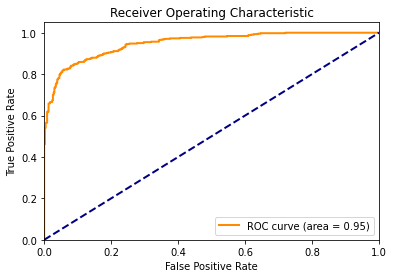

14/14 [==============================] - 16s 1s/step
Test Loss: 0.28628036165824444
Validation Loss: 0.3632181062850924
Training Time (seconds): 556.0233397483826
Inference Time (seconds): 34.63351535797119
Validation Accuracy: 0.85
Test Accuracy: 0.8733333333333333
Confusion Matrix:
 [[403  58]
 [ 56 383]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       461
           1       0.87      0.87      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9490337436196443
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 80s 2s/step - loss: 0.1647 - accuracy: 0.9530 - val_loss: 0.3759 - val_accuracy: 0.8405
Epoch 2/150
53/53 [==============================] - 80s 2s/step - loss: 0.1582 - accuracy: 0.9554 - val_loss: 0.3663 - val_accuracy: 0.8452
Epoch 3/150
53/53 [==============================] - 80s 2s/step - loss: 0.1561 - accuracy: 0.9554 - val_loss: 0.3782 - val_accuracy: 0.8310
Epoch 4/150
53/53 [==============================] - 80s 2s/step - loss: 0.1529 - accuracy: 0.9583 - val_loss: 0.3781 - val_accuracy: 0.8524
Epoch 5/150
53/53 [==============================] - 80s 2s/step - loss: 0.1522 - accuracy: 0.9530 - val_loss: 0.3662 - val_accuracy: 0.8595
Epoch 6/150
53/53 [==============================] - 80s 2s/step - loss: 0.1462 - accuracy: 0.9583 - val_loss: 0.3793 - val_accuracy: 0.8548
Epoch 7/150
53/53 [==============================] - 80s 2s/step - loss: 0.1422 - accuracy: 0.9613 - val_loss: 0.3709 - val_accuracy: 0.8476
Epoch 8/150
5

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


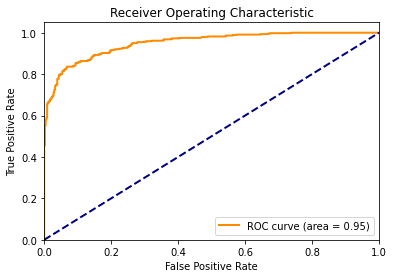

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2828516651743316
Validation Loss: 0.3662487140892909
Training Time (seconds): 803.8596587181091
Inference Time (seconds): 34.61208915710449
Validation Accuracy: 0.8595238095238096
Test Accuracy: 0.8677777777777778
Confusion Matrix:
 [[402  59]
 [ 60 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       461
           1       0.87      0.86      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9500170472232791
Metrics saved successfully


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 81s 2s/step - loss: 0.1451 - accuracy: 0.9631 - val_loss: 0.3697 - val_accuracy: 0.8452
Epoch 2/200
53/53 [==============================] - 80s 2s/step - loss: 0.1432 - accuracy: 0.9649 - val_loss: 0.3718 - val_accuracy: 0.8524
Epoch 3/200
53/53 [==============================] - 80s 2s/step - loss: 0.1437 - accuracy: 0.9637 - val_loss: 0.3794 - val_accuracy: 0.8452
Epoch 4/200
53/53 [==============================] - 80s 2s/step - loss: 0.1367 - accuracy: 0.9607 - val_loss: 0.3733 - val_accuracy: 0.8476
Epoch 5/200
53/53 [==============================] - 80s 2s/step - loss: 0.1348 - accuracy: 0.9661 - val_loss: 0.3872 - val_accuracy: 0.8405
Epoch 6/200
53/53 [==============================] - 80s 2s/step - loss: 0.1355 - accuracy: 0.9649 - val_loss: 0.3732 - val_accuracy: 0.8595
Training Time: 482.41693115234375 seconds


29/29 [==============================] - 34s 1s/step


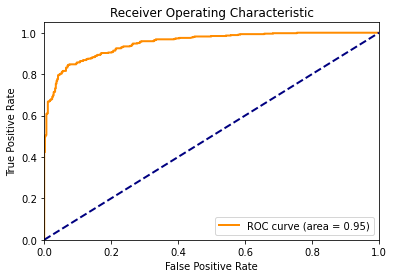

14/14 [==============================] - 16s 1s/step
Test Loss: 0.286903251842101
Validation Loss: 0.3696744609705966
Training Time (seconds): 482.41693115234375
Inference Time (seconds): 34.57599139213562
Validation Accuracy: 0.8452380952380952
Test Accuracy: 0.8666666666666667
Confusion Matrix:
 [[391  70]
 [ 50 389]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       461
           1       0.85      0.89      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9504271688268052
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
metrics={
    'Combination':'VGG16',
    'Validation Accuracy':val_accuracy*100,
    'Validation Loss':val_loss,
    'Test Accuracy':test_accuracy*100,
    'Test Loss':test_loss,
    'Training time':training_time,
    'Inference time':inference_time,
    'Cohens Kappa':kappa,
    'MCC':mcc,
    'Balanced Accuracy':balanced_accuracy
}
metrics_df=pd.DataFrame(metrics,index=[0])
metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense

In [7]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dense(128, activation='relu')(x)   # Additional dense layer
x = Dense(64, activation='relu')(x)    # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 81s 2s/step - loss: 0.6333 - accuracy: 0.6577 - val_loss: 0.5359 - val_accuracy: 0.7810
Epoch 2/50
53/53 [==============================] - 80s 2s/step - loss: 0.4859 - accuracy: 0.7750 - val_loss: 0.4678 - val_accuracy: 0.7976
Epoch 3/50
53/53 [==============================] - 80s 2s/step - loss: 0.4145 - accuracy: 0.8030 - val_loss: 0.4446 - val_accuracy: 0.7857
Epoch 4/50
53/53 [==============================] - 81s 2s/step - loss: 0.3709 - accuracy: 0.8310 - val_loss: 0.4161 - val_accuracy: 0.8238
Epoch 5/50
53/53 [==============================] - 80s 2s/step - loss: 0.3397 - accuracy: 0.8440 - val_loss: 0.4035 - val_accuracy: 0.8143
Epoch 6/50
53/53 [==============================] - 80s 2s/step - loss: 0.3179 - accuracy: 0.8571 - val_loss: 0.3971 - val_accuracy: 0.8262
Epoch 7/50
53/53 [==============================] - 80s 2s/step - loss: 0.2933 - accuracy: 0.8714 - val_loss: 0.4009 - val_accuracy: 0.8190
Epoch 8/50
53/53 [==

In [23]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


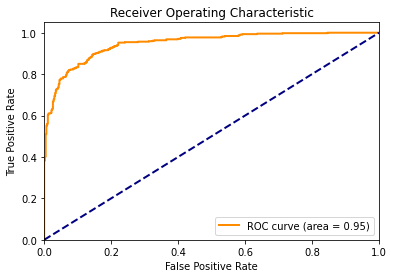

14/14 [==============================] - 16s 1s/step
Test Loss: 0.291611499925509
Validation Loss: 0.3757010920781283
Training Time (seconds): 1527.1618194580078
Inference Time (seconds): 34.530816316604614
Validation Accuracy: 0.8261904761904761
Test Accuracy: 0.8666666666666667
Confusion Matrix:
 [[406  55]
 [ 65 374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       461
           1       0.87      0.85      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9476106710676503
Metrics saved successfully


In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 68s 1s/step - loss: 0.6742 - accuracy: 0.6149 - val_loss: 0.5597 - val_accuracy: 0.7333
Epoch 2/100
53/53 [==============================] - 77s 1s/step - loss: 0.5098 - accuracy: 0.7762 - val_loss: 0.4782 - val_accuracy: 0.7976
Epoch 3/100
53/53 [==============================] - 79s 1s/step - loss: 0.4325 - accuracy: 0.8083 - val_loss: 0.4360 - val_accuracy: 0.8119
Epoch 4/100
53/53 [==============================] - 79s 1s/step - loss: 0.3873 - accuracy: 0.8238 - val_loss: 0.4282 - val_accuracy: 0.7929
Epoch 5/100
53/53 [==============================] - 79s 1s/step - loss: 0.3590 - accuracy: 0.8393 - val_loss: 0.4027 - val_accuracy: 0.8238
Epoch 6/100
53/53 [==============================] - 79s 1s/step - loss: 0.3264 - accuracy: 0.8565 - val_loss: 0.4018 - val_accuracy: 0.8357
Epoch 7/100
53/53 [==============================] - 79s 1s/step - loss: 0.3047 - accuracy: 0.8720 - val_loss: 0.3910 - val_accuracy: 0.8333
Epoch 8/100
5

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


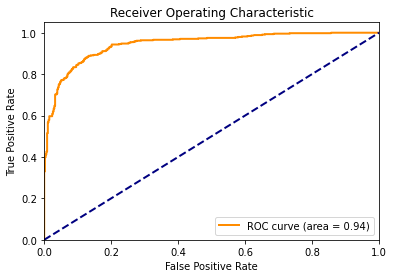

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29862873363670184
Validation Loss: 0.376830343585185
Training Time (seconds): 1410.648951292038
Inference Time (seconds): 34.0454306602478
Validation Accuracy: 0.830952380952381
Test Accuracy: 0.8744444444444445
Confusion Matrix:
 [[414  47]
 [ 66 373]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       461
           1       0.89      0.85      0.87       439

    accuracy                           0.87       900
   macro avg       0.88      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9448188794291899
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 79s 1s/step - loss: 0.2013 - accuracy: 0.9220 - val_loss: 0.3772 - val_accuracy: 0.8286
Epoch 2/150
53/53 [==============================] - 79s 1s/step - loss: 0.1879 - accuracy: 0.9333 - val_loss: 0.3966 - val_accuracy: 0.8357
Epoch 3/150
53/53 [==============================] - 79s 1s/step - loss: 0.1720 - accuracy: 0.9375 - val_loss: 0.3884 - val_accuracy: 0.8310
Epoch 4/150
53/53 [==============================] - 79s 1s/step - loss: 0.1672 - accuracy: 0.9369 - val_loss: 0.3956 - val_accuracy: 0.8238
Epoch 5/150
53/53 [==============================] - 79s 1s/step - loss: 0.1582 - accuracy: 0.9393 - val_loss: 0.3909 - val_accuracy: 0.8286
Epoch 6/150
53/53 [==============================] - 79s 1s/step - loss: 0.1460 - accuracy: 0.9512 - val_loss: 0.4102 - val_accuracy: 0.8214
Training Time: 474.5450620651245 seconds


In [12]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


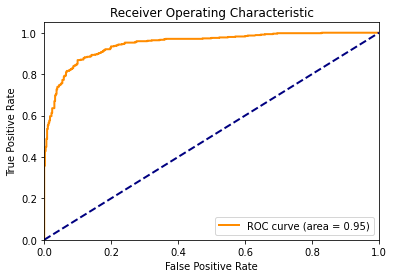

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2956326155384805
Validation Loss: 0.3771976547092328
Training Time (seconds): 474.5450620651245
Inference Time (seconds): 34.06522607803345
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8766666666666667
Confusion Matrix:
 [[407  54]
 [ 57 382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       461
           1       0.88      0.87      0.87       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.9461431274984065
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 79s 1s/step - loss: 0.1837 - accuracy: 0.9280 - val_loss: 0.3799 - val_accuracy: 0.8357
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.1773 - accuracy: 0.9345 - val_loss: 0.3849 - val_accuracy: 0.8310
Epoch 3/200
53/53 [==============================] - 79s 1s/step - loss: 0.1672 - accuracy: 0.9351 - val_loss: 0.3819 - val_accuracy: 0.8333
Epoch 4/200
53/53 [==============================] - 79s 2s/step - loss: 0.1582 - accuracy: 0.9500 - val_loss: 0.3852 - val_accuracy: 0.8405
Epoch 5/200
53/53 [==============================] - 79s 1s/step - loss: 0.1538 - accuracy: 0.9482 - val_loss: 0.4447 - val_accuracy: 0.8262
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.1484 - accuracy: 0.9452 - val_loss: 0.3947 - val_accuracy: 0.8381
Training Time: 475.26031398773193 seconds


29/29 [==============================] - 34s 1s/step


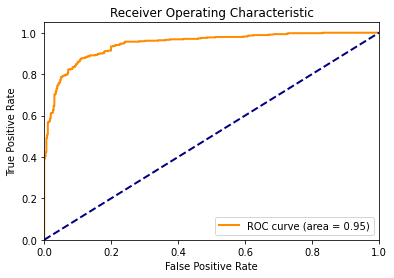

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29526233559069515
Validation Loss: 0.37986486271289754
Training Time (seconds): 475.26031398773193
Inference Time (seconds): 34.018049240112305
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.8822222222222222
Confusion Matrix:
 [[409  52]
 [ 54 385]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       461
           1       0.88      0.88      0.88       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.94608383280874
Metrics saved successfully


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Dense+Dropout

In [7]:
from tensorflow.keras.layers import Dropout

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
x = Dropout(0.5)(x)  # Dropout layer with 50% dropout rate
x = Dense(128, activation='relu')(x)  # Additional dense layer
predictions = Dense(1, activation='sigmoid')(x)   # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 80s 2s/step - loss: 0.8646 - accuracy: 0.5452 - val_loss: 0.5958 - val_accuracy: 0.6714
Epoch 2/50
53/53 [==============================] - 79s 1s/step - loss: 0.6745 - accuracy: 0.6381 - val_loss: 0.5114 - val_accuracy: 0.7667
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.6190 - accuracy: 0.6708 - val_loss: 0.4942 - val_accuracy: 0.7643
Epoch 4/50
53/53 [==============================] - 79s 1s/step - loss: 0.5631 - accuracy: 0.7065 - val_loss: 0.4714 - val_accuracy: 0.7810
Epoch 5/50
53/53 [==============================] - 79s 2s/step - loss: 0.5392 - accuracy: 0.7298 - val_loss: 0.4477 - val_accuracy: 0.7929
Epoch 6/50
53/53 [==============================] - 79s 1s/step - loss: 0.5159 - accuracy: 0.7554 - val_loss: 0.4379 - val_accuracy: 0.8143
Epoch 7/50
53/53 [==============================] - 79s 1s/step - loss: 0.5008 - accuracy: 0.7363 - val_loss: 0.4320 - val_accuracy: 0.8024
Epoch 8/50
53/53 [==

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)


29/29 [==============================] - 34s 1s/step


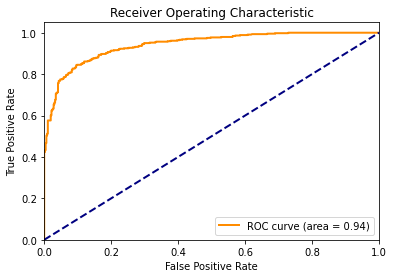

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3048999170175028
Validation Loss: 0.3695000661109398
Training Time (seconds): 3084.5614247322083
Inference Time (seconds): 34.01579284667969
Validation Accuracy: 0.8523809523809524
Test Accuracy: 0.8655555555555555
Confusion Matrix:
 [[400  61]
 [ 60 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       461
           1       0.86      0.86      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9419677931010628
Metrics saved successfully


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [20]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 79s 2s/step - loss: 0.2678 - accuracy: 0.8810 - val_loss: 0.3679 - val_accuracy: 0.8595
Epoch 2/100
53/53 [==============================] - 79s 1s/step - loss: 0.2536 - accuracy: 0.9012 - val_loss: 0.3749 - val_accuracy: 0.8500
Epoch 3/100
53/53 [==============================] - 79s 1s/step - loss: 0.2500 - accuracy: 0.8976 - val_loss: 0.3767 - val_accuracy: 0.8452
Epoch 4/100
53/53 [==============================] - 79s 1s/step - loss: 0.2579 - accuracy: 0.8887 - val_loss: 0.3711 - val_accuracy: 0.8452
Epoch 5/100
53/53 [==============================] - 79s 1s/step - loss: 0.2411 - accuracy: 0.8976 - val_loss: 0.3768 - val_accuracy: 0.8476
Epoch 6/100
53/53 [==============================] - 79s 1s/step - loss: 0.2305 - accuracy: 0.9042 - val_loss: 0.3757 - val_accuracy: 0.8500
Training Time: 475.0528790950775 seconds


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


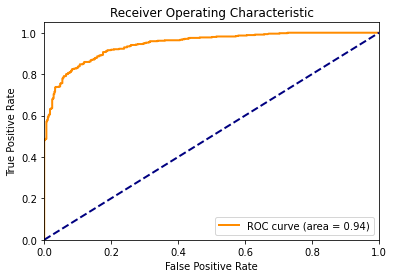

14/14 [==============================] - 15s 1s/step
Test Loss: 0.2984235639785771
Validation Loss: 0.36794024168221295
Training Time (seconds): 475.0528790950775
Inference Time (seconds): 34.11019229888916
Validation Accuracy: 0.8595238095238096
Test Accuracy: 0.8655555555555555
Confusion Matrix:
 [[402  59]
 [ 62 377]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       461
           1       0.86      0.86      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9445718182222463
Metrics saved successfully


In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [23]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 79s 2s/step - loss: 0.2590 - accuracy: 0.8869 - val_loss: 0.3700 - val_accuracy: 0.8405
Epoch 2/150
53/53 [==============================] - 79s 1s/step - loss: 0.2439 - accuracy: 0.8994 - val_loss: 0.3742 - val_accuracy: 0.8405
Epoch 3/150
53/53 [==============================] - 79s 2s/step - loss: 0.2503 - accuracy: 0.8976 - val_loss: 0.3722 - val_accuracy: 0.8452
Epoch 4/150
53/53 [==============================] - 79s 1s/step - loss: 0.2558 - accuracy: 0.8923 - val_loss: 0.3791 - val_accuracy: 0.8476
Epoch 5/150
53/53 [==============================] - 79s 1s/step - loss: 0.2425 - accuracy: 0.8893 - val_loss: 0.3764 - val_accuracy: 0.8548
Epoch 6/150
53/53 [==============================] - 79s 1s/step - loss: 0.2450 - accuracy: 0.8982 - val_loss: 0.3758 - val_accuracy: 0.8405
Training Time: 476.19626688957214 seconds


In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


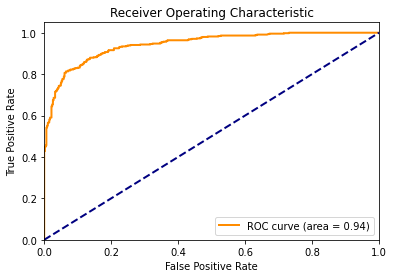

14/14 [==============================] - 16s 1s/step
Test Loss: 0.30114620643331674
Validation Loss: 0.3699831595356098
Training Time (seconds): 476.19626688957214
Inference Time (seconds): 34.15145993232727
Validation Accuracy: 0.8404761904761905
Test Accuracy: 0.8677777777777778
Confusion Matrix:
 [[406  55]
 [ 64 375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       461
           1       0.87      0.85      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9434699252392789
Metrics saved successfully


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 79s 2s/step - loss: 0.2581 - accuracy: 0.8827 - val_loss: 0.3803 - val_accuracy: 0.8476
Epoch 2/200
53/53 [==============================] - 79s 2s/step - loss: 0.2480 - accuracy: 0.8917 - val_loss: 0.3800 - val_accuracy: 0.8429
Epoch 3/200
53/53 [==============================] - 79s 1s/step - loss: 0.2693 - accuracy: 0.8804 - val_loss: 0.3738 - val_accuracy: 0.8452
Epoch 4/200
53/53 [==============================] - 79s 1s/step - loss: 0.2347 - accuracy: 0.8994 - val_loss: 0.3813 - val_accuracy: 0.8429
Epoch 5/200
53/53 [==============================] - 79s 2s/step - loss: 0.2444 - accuracy: 0.8923 - val_loss: 0.3866 - val_accuracy: 0.8405
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.2417 - accuracy: 0.9042 - val_loss: 0.3853 - val_accuracy: 0.8500
Epoch 7/200
53/53 [==============================] - 79s 2s/step - loss: 0.2224 - accuracy: 0.9101 - val_loss: 0.3771 - val_accuracy: 0.8548
Epoch 8/200
5

29/29 [==============================] - 34s 1s/step


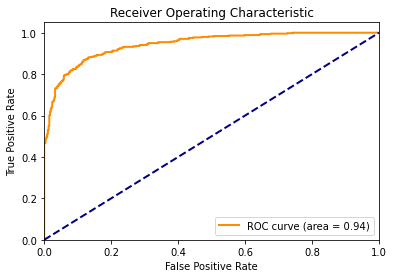

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2996033397971162
Validation Loss: 0.37383312328970664
Training Time (seconds): 633.5644209384918
Inference Time (seconds): 34.07548475265503
Validation Accuracy: 0.8452380952380952
Test Accuracy: 0.87
Confusion Matrix:
 [[409  52]
 [ 65 374]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       461
           1       0.88      0.85      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9435588672737785
Metrics saved successfully


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Dense+Dropout'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GlobalAveragePooling+Dense

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add GlobalAveragePooling2D layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layers
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)  # Additional Dense layer
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [29]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 80s 2s/step - loss: 0.6418 - accuracy: 0.6363 - val_loss: 0.5297 - val_accuracy: 0.7310
Epoch 2/50
53/53 [==============================] - 79s 1s/step - loss: 0.4776 - accuracy: 0.7732 - val_loss: 0.4519 - val_accuracy: 0.7952
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.4122 - accuracy: 0.8101 - val_loss: 0.4292 - val_accuracy: 0.8024
Epoch 4/50
53/53 [==============================] - 79s 2s/step - loss: 0.3704 - accuracy: 0.8405 - val_loss: 0.4026 - val_accuracy: 0.8143
Epoch 5/50
53/53 [==============================] - 79s 1s/step - loss: 0.3382 - accuracy: 0.8500 - val_loss: 0.3941 - val_accuracy: 0.8262
Epoch 6/50
53/53 [==============================] - 79s 2s/step - loss: 0.3131 - accuracy: 0.8673 - val_loss: 0.3860 - val_accuracy: 0.8286
Epoch 7/50
53/53 [==============================] - 79s 2s/step - loss: 0.2895 - accuracy: 0.8845 - val_loss: 0.3896 - val_accuracy: 0.8262
Epoch 8/50
53/53 [==

In [30]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


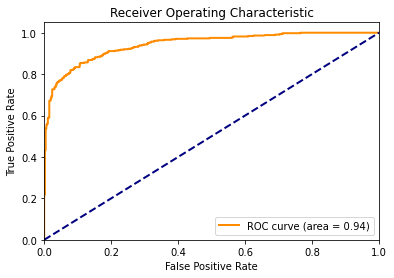

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3066051975759298
Validation Loss: 0.37040260955772975
Training Time (seconds): 1188.2517621517181
Inference Time (seconds): 34.17098927497864
Validation Accuracy: 0.8404761904761905
Test Accuracy: 0.8677777777777778
Confusion Matrix:
 [[401  60]
 [ 59 380]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       461
           1       0.86      0.87      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.94289674323917
Metrics saved successfully


In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [32]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 79s 1s/step - loss: 0.2354 - accuracy: 0.9036 - val_loss: 0.3925 - val_accuracy: 0.8167
Epoch 2/100
53/53 [==============================] - 79s 1s/step - loss: 0.2209 - accuracy: 0.9167 - val_loss: 0.3726 - val_accuracy: 0.8286
Epoch 3/100
53/53 [==============================] - 79s 2s/step - loss: 0.2128 - accuracy: 0.9238 - val_loss: 0.3688 - val_accuracy: 0.8405
Epoch 4/100
53/53 [==============================] - 79s 1s/step - loss: 0.2025 - accuracy: 0.9190 - val_loss: 0.3758 - val_accuracy: 0.8286
Epoch 5/100
53/53 [==============================] - 79s 2s/step - loss: 0.2021 - accuracy: 0.9238 - val_loss: 0.3670 - val_accuracy: 0.8357
Epoch 6/100
53/53 [==============================] - 80s 2s/step - loss: 0.1882 - accuracy: 0.9351 - val_loss: 0.3777 - val_accuracy: 0.8405
Epoch 7/100
53/53 [==============================] - 79s 2s/step - loss: 0.1858 - accuracy: 0.9298 - val_loss: 0.3958 - val_accuracy: 0.8286
Epoch 8/100
5

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


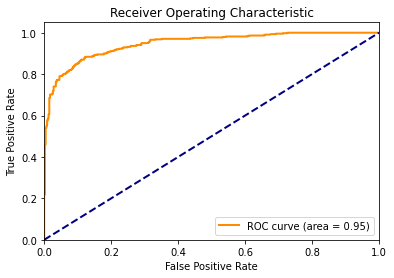

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2957595956343913
Validation Loss: 0.3670078948613975
Training Time (seconds): 792.6199669837952
Inference Time (seconds): 34.44627833366394
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.87
Confusion Matrix:
 [[394  67]
 [ 50 389]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       461
           1       0.85      0.89      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9469683119295975
Metrics saved successfully


In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 73s 1s/step - loss: 0.6014 - accuracy: 0.6738 - val_loss: 0.5302 - val_accuracy: 0.7405
Epoch 2/150
53/53 [==============================] - 79s 1s/step - loss: 0.4754 - accuracy: 0.7744 - val_loss: 0.4618 - val_accuracy: 0.7762
Epoch 3/150
53/53 [==============================] - 79s 2s/step - loss: 0.4204 - accuracy: 0.8071 - val_loss: 0.4288 - val_accuracy: 0.8286
Epoch 4/150
53/53 [==============================] - 79s 1s/step - loss: 0.3808 - accuracy: 0.8244 - val_loss: 0.4136 - val_accuracy: 0.8262
Epoch 5/150
53/53 [==============================] - 79s 1s/step - loss: 0.3493 - accuracy: 0.8518 - val_loss: 0.4131 - val_accuracy: 0.8095
Epoch 6/150
53/53 [==============================] - 79s 2s/step - loss: 0.3287 - accuracy: 0.8631 - val_loss: 0.3867 - val_accuracy: 0.8262
Epoch 7/150
53/53 [==============================] - 79s 1s/step - loss: 0.3023 - accuracy: 0.8762 - val_loss: 0.3863 - val_accuracy: 0.8286
Epoch 8/150
5

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


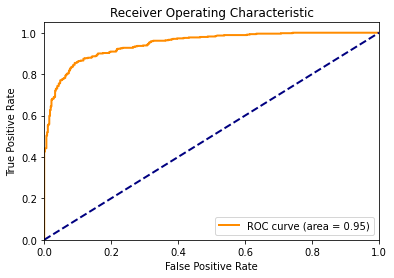

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29470523552007516
Validation Loss: 0.3638889104021588
Training Time (seconds): 1576.8698794841766
Inference Time (seconds): 34.19882559776306
Validation Accuracy: 0.8428571428571429
Test Accuracy: 0.88
Confusion Matrix:
 [[413  48]
 [ 60 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88       461
           1       0.89      0.86      0.88       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.9457675944638524
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 79s 2s/step - loss: 0.1877 - accuracy: 0.9351 - val_loss: 0.3652 - val_accuracy: 0.8452
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.1800 - accuracy: 0.9393 - val_loss: 0.3715 - val_accuracy: 0.8357
Epoch 3/200
53/53 [==============================] - 79s 1s/step - loss: 0.1706 - accuracy: 0.9446 - val_loss: 0.3754 - val_accuracy: 0.8452
Epoch 4/200
53/53 [==============================] - 79s 2s/step - loss: 0.1677 - accuracy: 0.9452 - val_loss: 0.3688 - val_accuracy: 0.8286
Epoch 5/200
53/53 [==============================] - 79s 1s/step - loss: 0.1560 - accuracy: 0.9512 - val_loss: 0.3739 - val_accuracy: 0.8429
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.1494 - accuracy: 0.9530 - val_loss: 0.3737 - val_accuracy: 0.8452
Training Time: 475.3480370044708 seconds


29/29 [==============================] - 34s 1s/step


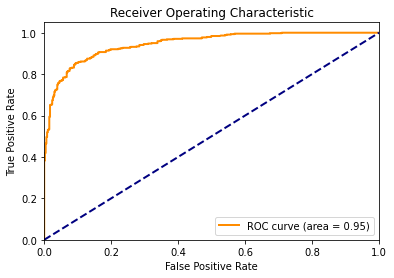

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29379396295158033
Validation Loss: 0.365213006888454
Training Time (seconds): 475.3480370044708
Inference Time (seconds): 34.130552530288696
Validation Accuracy: 0.8452380952380952
Test Accuracy: 0.8788888888888889
Confusion Matrix:
 [[418  43]
 [ 66 373]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88       461
           1       0.90      0.85      0.87       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.9461777160673785
Metrics saved successfully


In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GlobalAveragePooling+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+ Conv2D + GlobalAveragePooling2D +Dropout+ Dense

In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Conv2D layer
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)  # Example Conv2D layer

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(x)

# Add Dropout layer
x = Dropout(0.5)(x)  # Example Dropout layer with dropout rate of 0.5

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 80s 2s/step - loss: 0.7089 - accuracy: 0.6185 - val_loss: 0.5182 - val_accuracy: 0.7524
Epoch 2/50
53/53 [==============================] - 79s 2s/step - loss: 0.5597 - accuracy: 0.7024 - val_loss: 0.4365 - val_accuracy: 0.8000
Epoch 3/50
53/53 [==============================] - 80s 2s/step - loss: 0.4895 - accuracy: 0.7565 - val_loss: 0.4076 - val_accuracy: 0.8143
Epoch 4/50
53/53 [==============================] - 79s 2s/step - loss: 0.4119 - accuracy: 0.8161 - val_loss: 0.3856 - val_accuracy: 0.8310
Epoch 5/50
53/53 [==============================] - 79s 2s/step - loss: 0.3831 - accuracy: 0.8256 - val_loss: 0.3541 - val_accuracy: 0.8381
Epoch 6/50
53/53 [==============================] - 79s 2s/step - loss: 0.3683 - accuracy: 0.8351 - val_loss: 0.3771 - val_accuracy: 0.8286
Epoch 7/50
53/53 [==============================] - 79s 2s/step - loss: 0.3432 - accuracy: 0.8482 - val_loss: 0.3380 - val_accuracy: 0.8524
Epoch 8/50
53/53 [==

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


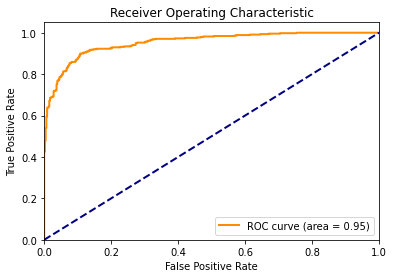

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2778638959533252
Validation Loss: 0.32309733488153114
Training Time (seconds): 1190.7793128490448
Inference Time (seconds): 34.2576470375061
Validation Accuracy: 0.8595238095238096
Test Accuracy: 0.8855555555555555
Confusion Matrix:
 [[426  35]
 [ 68 371]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89       461
           1       0.91      0.85      0.88       439

    accuracy                           0.89       900
   macro avg       0.89      0.88      0.89       900
weighted avg       0.89      0.89      0.89       900

ROC AUC Score: 0.9531102535342105
Metrics saved successfully


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 79s 2s/step - loss: 0.2596 - accuracy: 0.8821 - val_loss: 0.3312 - val_accuracy: 0.8643
Epoch 2/100
53/53 [==============================] - 79s 2s/step - loss: 0.2526 - accuracy: 0.8911 - val_loss: 0.3275 - val_accuracy: 0.8595
Epoch 3/100
53/53 [==============================] - 79s 2s/step - loss: 0.2325 - accuracy: 0.9125 - val_loss: 0.3274 - val_accuracy: 0.8667
Epoch 4/100
53/53 [==============================] - 79s 1s/step - loss: 0.2199 - accuracy: 0.9018 - val_loss: 0.3582 - val_accuracy: 0.8429
Epoch 5/100
53/53 [==============================] - 79s 2s/step - loss: 0.2063 - accuracy: 0.9113 - val_loss: 0.3300 - val_accuracy: 0.8619
Epoch 6/100
53/53 [==============================] - 79s 1s/step - loss: 0.1872 - accuracy: 0.9268 - val_loss: 0.3479 - val_accuracy: 0.8571
Epoch 7/100
53/53 [==============================] - 79s 2s/step - loss: 0.1679 - accuracy: 0.9363 - val_loss: 0.3384 - val_accuracy: 0.8643
Epoch 8/100
5

In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


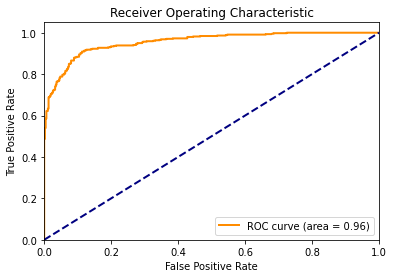

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2681133859708253
Validation Loss: 0.32741817611308704
Training Time (seconds): 634.476057767868
Inference Time (seconds): 34.341606855392456
Validation Accuracy: 0.8666666666666667
Test Accuracy: 0.8944444444444445
Confusion Matrix:
 [[413  48]
 [ 47 392]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       461
           1       0.89      0.89      0.89       439

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900

ROC AUC Score: 0.9553338043967012
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [21]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 79s 2s/step - loss: 0.2087 - accuracy: 0.9167 - val_loss: 0.3357 - val_accuracy: 0.8571
Epoch 2/150
53/53 [==============================] - 80s 2s/step - loss: 0.2001 - accuracy: 0.9167 - val_loss: 0.3343 - val_accuracy: 0.8548
Epoch 3/150
53/53 [==============================] - 79s 2s/step - loss: 0.1851 - accuracy: 0.9250 - val_loss: 0.3328 - val_accuracy: 0.8667
Epoch 4/150
53/53 [==============================] - 79s 2s/step - loss: 0.1663 - accuracy: 0.9363 - val_loss: 0.3632 - val_accuracy: 0.8571
Epoch 5/150
53/53 [==============================] - 79s 2s/step - loss: 0.1673 - accuracy: 0.9351 - val_loss: 0.3420 - val_accuracy: 0.8500
Epoch 6/150
53/53 [==============================] - 79s 2s/step - loss: 0.1457 - accuracy: 0.9429 - val_loss: 0.3459 - val_accuracy: 0.8524
Epoch 7/150
53/53 [==============================] - 79s 2s/step - loss: 0.1458 - accuracy: 0.9458 - val_loss: 0.3367 - val_accuracy: 0.8643
Epoch 8/150
5

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


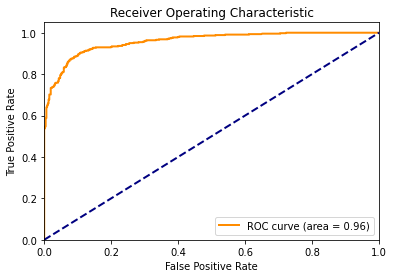

14/14 [==============================] - 16s 1s/step
Test Loss: 0.26267080893329187
Validation Loss: 0.332791421405499
Training Time (seconds): 635.8146569728851
Inference Time (seconds): 34.22377038002014
Validation Accuracy: 0.8666666666666667
Test Accuracy: 0.8955555555555555
Confusion Matrix:
 [[416  45]
 [ 49 390]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       461
           1       0.90      0.89      0.89       439

    accuracy                           0.90       900
   macro avg       0.90      0.90      0.90       900
weighted avg       0.90      0.90      0.90       900

ROC AUC Score: 0.9581848907248283
Metrics saved successfully


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 80s 2s/step - loss: 0.1734 - accuracy: 0.9250 - val_loss: 0.3997 - val_accuracy: 0.8405
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.1784 - accuracy: 0.9304 - val_loss: 0.3356 - val_accuracy: 0.8643
Epoch 3/200
53/53 [==============================] - 79s 2s/step - loss: 0.1540 - accuracy: 0.9440 - val_loss: 0.3423 - val_accuracy: 0.8571
Epoch 4/200
53/53 [==============================] - 79s 2s/step - loss: 0.1483 - accuracy: 0.9458 - val_loss: 0.3497 - val_accuracy: 0.8690
Epoch 5/200
53/53 [==============================] - 79s 2s/step - loss: 0.1431 - accuracy: 0.9458 - val_loss: 0.3671 - val_accuracy: 0.8571
Epoch 6/200
53/53 [==============================] - 79s 2s/step - loss: 0.1244 - accuracy: 0.9571 - val_loss: 0.3614 - val_accuracy: 0.8595
Epoch 7/200
53/53 [==============================] - 79s 2s/step - loss: 0.1176 - accuracy: 0.9565 - val_loss: 0.3823 - val_accuracy: 0.8524
Training Time

29/29 [==============================] - 34s 1s/step


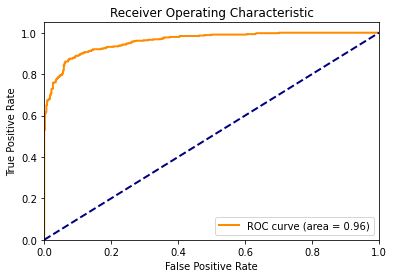

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2597446955726659
Validation Loss: 0.3356009377789742
Training Time (seconds): 555.4737546443939
Inference Time (seconds): 34.035362243652344
Validation Accuracy: 0.8642857142857143
Test Accuracy: 0.8933333333333333
Confusion Matrix:
 [[412  49]
 [ 47 392]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.89      0.90       461
           1       0.89      0.89      0.89       439

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900

ROC AUC Score: 0.9596524342940721
Metrics saved successfully


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Conv2D+GlobalAveragePooling+Dropout+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+LSTM+Dense

In [8]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, LSTM,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Extract features from images using VGG16
vgg_output = base_model.output

# Add GlobalAveragePooling2D layer to pool spatial features
x = GlobalAveragePooling2D()(vgg_output)

# Reshape features for LSTM input
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for LSTM input

# Add LSTM layer
x = LSTM(128)(x)

# Add Dense layers for classification
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with LSTM and Dense layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 69s 1s/step - loss: 0.6417 - accuracy: 0.6899 - val_loss: 0.6057 - val_accuracy: 0.7190
Epoch 2/50
53/53 [==============================] - 77s 1s/step - loss: 0.5452 - accuracy: 0.7560 - val_loss: 0.5311 - val_accuracy: 0.7405
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.4611 - accuracy: 0.7857 - val_loss: 0.4645 - val_accuracy: 0.7881
Epoch 4/50
53/53 [==============================] - 79s 2s/step - loss: 0.4020 - accuracy: 0.8220 - val_loss: 0.4373 - val_accuracy: 0.7857
Epoch 5/50
53/53 [==============================] - 79s 1s/step - loss: 0.3596 - accuracy: 0.8411 - val_loss: 0.4067 - val_accuracy: 0.8143
Epoch 6/50
53/53 [==============================] - 79s 1s/step - loss: 0.3289 - accuracy: 0.8560 - val_loss: 0.3993 - val_accuracy: 0.8048
Epoch 7/50
53/53 [==============================] - 79s 2s/step - loss: 0.2994 - accuracy: 0.8780 - val_loss: 0.3919 - val_accuracy: 0.8262
Epoch 8/50
53/53 [==

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


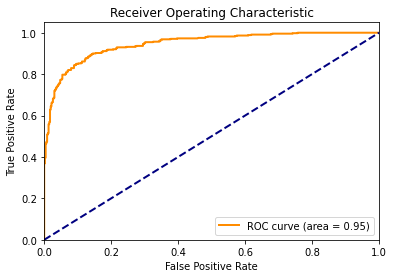

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2973523706651348
Validation Loss: 0.3671527969362369
Training Time (seconds): 1255.0914287567139
Inference Time (seconds): 34.248223304748535
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.8733333333333333
Confusion Matrix:
 [[404  57]
 [ 57 382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       461
           1       0.87      0.87      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9455452393776035
Metrics saved successfully


In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 80s 2s/step - loss: 0.2029 - accuracy: 0.9250 - val_loss: 0.3915 - val_accuracy: 0.8048
Epoch 2/100
53/53 [==============================] - 79s 1s/step - loss: 0.1939 - accuracy: 0.9268 - val_loss: 0.3664 - val_accuracy: 0.8333
Epoch 3/100
53/53 [==============================] - 79s 2s/step - loss: 0.1778 - accuracy: 0.9357 - val_loss: 0.3790 - val_accuracy: 0.8190
Epoch 4/100
53/53 [==============================] - 79s 2s/step - loss: 0.1669 - accuracy: 0.9429 - val_loss: 0.3767 - val_accuracy: 0.8286
Epoch 5/100
53/53 [==============================] - 79s 2s/step - loss: 0.1543 - accuracy: 0.9452 - val_loss: 0.3767 - val_accuracy: 0.8310
Epoch 6/100
53/53 [==============================] - 79s 1s/step - loss: 0.1465 - accuracy: 0.9464 - val_loss: 0.4113 - val_accuracy: 0.8167
Epoch 7/100
53/53 [==============================] - 79s 2s/step - loss: 0.1554 - accuracy: 0.9435 - val_loss: 0.3814 - val_accuracy: 0.8429
Training Time

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


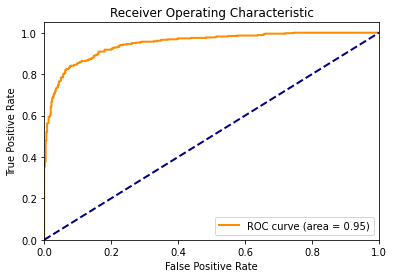

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29246176465062845
Validation Loss: 0.36636027925197934
Training Time (seconds): 555.4653222560883
Inference Time (seconds): 34.14903211593628
Validation Accuracy: 0.8333333333333334
Test Accuracy: 0.8744444444444445
Confusion Matrix:
 [[412  49]
 [ 64 375]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       461
           1       0.88      0.85      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9472697266020684
Metrics saved successfully


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [34]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 79s 2s/step - loss: 0.1852 - accuracy: 0.9351 - val_loss: 0.3847 - val_accuracy: 0.8286
Epoch 2/150
53/53 [==============================] - 79s 2s/step - loss: 0.1720 - accuracy: 0.9381 - val_loss: 0.3788 - val_accuracy: 0.8286
Epoch 3/150
53/53 [==============================] - 79s 1s/step - loss: 0.1574 - accuracy: 0.9506 - val_loss: 0.3807 - val_accuracy: 0.8238
Epoch 4/150
53/53 [==============================] - 79s 2s/step - loss: 0.1485 - accuracy: 0.9482 - val_loss: 0.3774 - val_accuracy: 0.8357
Epoch 5/150
53/53 [==============================] - 79s 1s/step - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.3850 - val_accuracy: 0.8286
Epoch 6/150
53/53 [==============================] - 80s 2s/step - loss: 0.1315 - accuracy: 0.9589 - val_loss: 0.3928 - val_accuracy: 0.8286
Epoch 7/150
53/53 [==============================] - 79s 1s/step - loss: 0.1203 - accuracy: 0.9607 - val_loss: 0.3900 - val_accuracy: 0.8262
Epoch 8/150
5

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


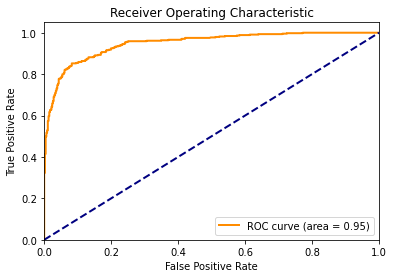

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2951636014079316
Validation Loss: 0.37742303009433714
Training Time (seconds): 713.8791592121124
Inference Time (seconds): 34.13312530517578
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.8733333333333333
Confusion Matrix:
 [[400  61]
 [ 53 386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       461
           1       0.86      0.88      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9479713804297877
Metrics saved successfully


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [9]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 70s 1s/step - loss: 0.6407 - accuracy: 0.6756 - val_loss: 0.5832 - val_accuracy: 0.7476
Epoch 2/200
53/53 [==============================] - 79s 2s/step - loss: 0.5428 - accuracy: 0.7494 - val_loss: 0.4922 - val_accuracy: 0.7881
Epoch 3/200
53/53 [==============================] - 79s 1s/step - loss: 0.4627 - accuracy: 0.7917 - val_loss: 0.4481 - val_accuracy: 0.7976
Epoch 4/200
53/53 [==============================] - 79s 1s/step - loss: 0.4126 - accuracy: 0.8173 - val_loss: 0.4113 - val_accuracy: 0.8143
Epoch 5/200
53/53 [==============================] - 79s 1s/step - loss: 0.3750 - accuracy: 0.8369 - val_loss: 0.3960 - val_accuracy: 0.8190
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.3453 - accuracy: 0.8500 - val_loss: 0.3869 - val_accuracy: 0.8214
Epoch 7/200
53/53 [==============================] - 79s 1s/step - loss: 0.3266 - accuracy: 0.8714 - val_loss: 0.3842 - val_accuracy: 0.8214
Epoch 8/200
5

29/29 [==============================] - 34s 1s/step


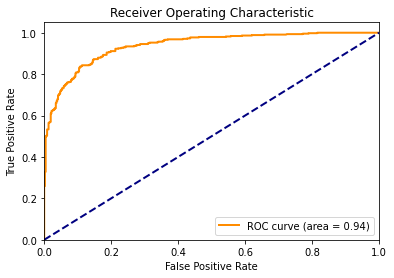

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3208907222689569
Validation Loss: 0.37217958013731184
Training Time (seconds): 1178.1346185207367
Inference Time (seconds): 34.32311964035034
Validation Accuracy: 0.830952380952381
Test Accuracy: 0.8644444444444445
Confusion Matrix:
 [[412  49]
 [ 73 366]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       461
           1       0.88      0.83      0.86       439

    accuracy                           0.86       900
   macro avg       0.87      0.86      0.86       900
weighted avg       0.87      0.86      0.86       900

ROC AUC Score: 0.937243982824305
Metrics saved successfully


In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+LSTM+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+GRU+Dense

In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)  # Add more dense layers if needed
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [12]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 79s 2s/step - loss: 0.7004 - accuracy: 0.6089 - val_loss: 0.5806 - val_accuracy: 0.6857
Epoch 2/50
53/53 [==============================] - 79s 1s/step - loss: 0.5130 - accuracy: 0.7470 - val_loss: 0.5030 - val_accuracy: 0.7476
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.4415 - accuracy: 0.7899 - val_loss: 0.4660 - val_accuracy: 0.7833
Epoch 4/50
53/53 [==============================] - 79s 2s/step - loss: 0.4037 - accuracy: 0.8179 - val_loss: 0.4468 - val_accuracy: 0.7881
Epoch 5/50
53/53 [==============================] - 79s 1s/step - loss: 0.3801 - accuracy: 0.8339 - val_loss: 0.4234 - val_accuracy: 0.8119
Epoch 6/50
53/53 [==============================] - 79s 1s/step - loss: 0.3541 - accuracy: 0.8470 - val_loss: 0.4165 - val_accuracy: 0.8286
Epoch 7/50
53/53 [==============================] - 79s 1s/step - loss: 0.3377 - accuracy: 0.8583 - val_loss: 0.4102 - val_accuracy: 0.8143
Epoch 8/50
53/53 [==

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values for test data
y_test_encoded = label_encoder.fit_transform(y_test)

29/29 [==============================] - 34s 1s/step


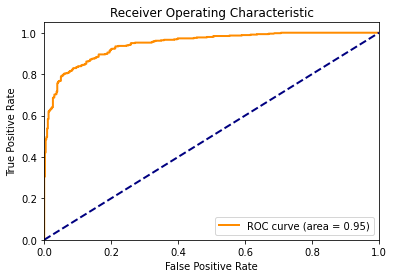

14/14 [==============================] - 16s 1s/step
Test Loss: 0.2994600551970884
Validation Loss: 0.36590888787008696
Training Time (seconds): 2374.2564883232117
Inference Time (seconds): 34.13965201377869
Validation Accuracy: 0.8523809523809524
Test Accuracy: 0.8644444444444445
Confusion Matrix:
 [[399  62]
 [ 60 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       461
           1       0.86      0.86      0.86       439

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900

ROC AUC Score: 0.9454859446879369
Metrics saved successfully


In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [15]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 79s 1s/step - loss: 0.1999 - accuracy: 0.9381 - val_loss: 0.3734 - val_accuracy: 0.8595
Epoch 2/100
53/53 [==============================] - 79s 1s/step - loss: 0.1952 - accuracy: 0.9304 - val_loss: 0.3690 - val_accuracy: 0.8452
Epoch 3/100
53/53 [==============================] - 79s 2s/step - loss: 0.1891 - accuracy: 0.9363 - val_loss: 0.3682 - val_accuracy: 0.8476
Epoch 4/100
53/53 [==============================] - 79s 2s/step - loss: 0.1826 - accuracy: 0.9405 - val_loss: 0.3703 - val_accuracy: 0.8405
Epoch 5/100
53/53 [==============================] - 79s 1s/step - loss: 0.1793 - accuracy: 0.9393 - val_loss: 0.3696 - val_accuracy: 0.8595
Epoch 6/100
53/53 [==============================] - 79s 1s/step - loss: 0.1752 - accuracy: 0.9429 - val_loss: 0.3733 - val_accuracy: 0.8405
Epoch 7/100
53/53 [==============================] - 79s 1s/step - loss: 0.1705 - accuracy: 0.9435 - val_loss: 0.3732 - val_accuracy: 0.8452
Epoch 8/100
5

29/29 [==============================] - 34s 1s/step


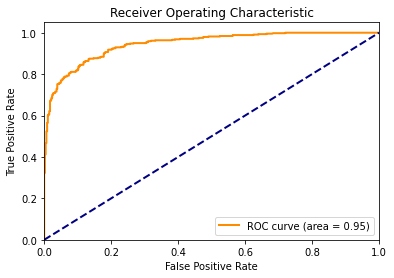

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29693211014894677
Validation Loss: 0.36823541042495117
Training Time (seconds): 633.4478030204773
Inference Time (seconds): 34.26219296455383
Validation Accuracy: 0.8476190476190476
Test Accuracy: 0.8677777777777778
Confusion Matrix:
 [[413  48]
 [ 71 368]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       461
           1       0.88      0.84      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9453080606189378
Metrics saved successfully


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [17]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 78s 1s/step - loss: 0.1856 - accuracy: 0.9345 - val_loss: 0.3674 - val_accuracy: 0.8476
Epoch 2/150
53/53 [==============================] - 79s 1s/step - loss: 0.1775 - accuracy: 0.9411 - val_loss: 0.3886 - val_accuracy: 0.8524
Epoch 3/150
53/53 [==============================] - 79s 1s/step - loss: 0.1781 - accuracy: 0.9435 - val_loss: 0.3702 - val_accuracy: 0.8476
Epoch 4/150
53/53 [==============================] - 79s 1s/step - loss: 0.1780 - accuracy: 0.9375 - val_loss: 0.3674 - val_accuracy: 0.8452
Epoch 5/150
53/53 [==============================] - 79s 1s/step - loss: 0.1679 - accuracy: 0.9482 - val_loss: 0.3727 - val_accuracy: 0.8476
Epoch 6/150
53/53 [==============================] - 79s 1s/step - loss: 0.1665 - accuracy: 0.9458 - val_loss: 0.3734 - val_accuracy: 0.8429
Training Time: 486.77891778945923 seconds


29/29 [==============================] - 34s 1s/step


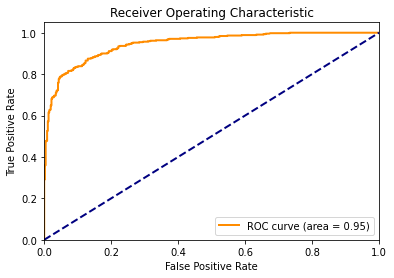

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29727805278609554
Validation Loss: 0.3673667811756583
Training Time (seconds): 486.77891778945923
Inference Time (seconds): 34.05428957939148
Validation Accuracy: 0.8476190476190476
Test Accuracy: 0.8711111111111111
Confusion Matrix:
 [[400  61]
 [ 55 384]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       461
           1       0.86      0.87      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9459257136362962
Metrics saved successfully


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [19]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 79s 1s/step - loss: 0.1805 - accuracy: 0.9333 - val_loss: 0.3751 - val_accuracy: 0.8476
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.1773 - accuracy: 0.9387 - val_loss: 0.3682 - val_accuracy: 0.8571
Epoch 3/200
53/53 [==============================] - 79s 1s/step - loss: 0.1691 - accuracy: 0.9488 - val_loss: 0.3705 - val_accuracy: 0.8429
Epoch 4/200
53/53 [==============================] - 79s 1s/step - loss: 0.1712 - accuracy: 0.9405 - val_loss: 0.3670 - val_accuracy: 0.8476
Epoch 5/200
53/53 [==============================] - 79s 1s/step - loss: 0.1650 - accuracy: 0.9494 - val_loss: 0.3696 - val_accuracy: 0.8476
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.1658 - accuracy: 0.9446 - val_loss: 0.3763 - val_accuracy: 0.8476
Epoch 7/200
53/53 [==============================] - 79s 1s/step - loss: 0.1597 - accuracy: 0.9518 - val_loss: 0.3680 - val_accuracy: 0.8548
Epoch 8/200
5

29/29 [==============================] - 34s 1s/step


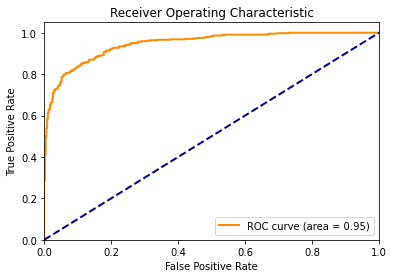

14/14 [==============================] - 16s 1s/step
Test Loss: 0.29292333216429206
Validation Loss: 0.36704132612494567
Training Time (seconds): 711.4835398197174
Inference Time (seconds): 33.91545104980469
Validation Accuracy: 0.8476190476190476
Test Accuracy: 0.8677777777777778
Confusion Matrix:
 [[405  56]
 [ 63 376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       461
           1       0.87      0.86      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9466767797054043
Metrics saved successfully


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+GRU+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Attention Mechanism+Dense

In [21]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Attention, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add your own classification layers on top of VGG16
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Apply attention mechanism
att = Attention()([x, x])

# Concatenate attention weights with original features
x = Concatenate()([x, att])

# Add Dense layers
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)  # Assuming binary classification

# Combine the base VGG16 model with your classification layers
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the VGG16 model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 224, 224, 64)         1792      ['input_4[0][0]']             
                                                                                                  
 block1_conv2 (Conv2D)       (None, 224, 224, 64)         36928     ['block1_conv1[0][0]']        
                                                                                                  
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)         0         ['block1_conv2[0][0]']        
                                                                                            

In [22]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 80s 2s/step - loss: 0.8186 - accuracy: 0.5708 - val_loss: 0.6373 - val_accuracy: 0.6643
Epoch 2/50
53/53 [==============================] - 79s 1s/step - loss: 0.6096 - accuracy: 0.6708 - val_loss: 0.5859 - val_accuracy: 0.7190
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.5072 - accuracy: 0.7411 - val_loss: 0.5329 - val_accuracy: 0.7643
Epoch 4/50
53/53 [==============================] - 79s 1s/step - loss: 0.4992 - accuracy: 0.7435 - val_loss: 0.5044 - val_accuracy: 0.7667
Epoch 5/50
53/53 [==============================] - 79s 2s/step - loss: 0.4322 - accuracy: 0.7899 - val_loss: 0.4749 - val_accuracy: 0.7857
Epoch 6/50
53/53 [==============================] - 79s 1s/step - loss: 0.4079 - accuracy: 0.7982 - val_loss: 0.4664 - val_accuracy: 0.7929
Epoch 7/50
53/53 [==============================] - 79s 1s/step - loss: 0.3901 - accuracy: 0.8101 - val_loss: 0.4687 - val_accuracy: 0.7762
Epoch 8/50
53/53 [==

29/29 [==============================] - 34s 1s/step


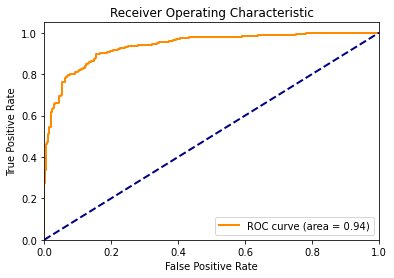

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3231893878348212
Validation Loss: 0.40888036388261956
Training Time (seconds): 2059.2410049438477
Inference Time (seconds): 34.08055329322815
Validation Accuracy: 0.8166666666666667
Test Accuracy: 0.8622222222222222
Confusion Matrix:
 [[397  64]
 [ 60 379]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       461
           1       0.86      0.86      0.86       439

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900

ROC AUC Score: 0.9370240983501253
Metrics saved successfully


In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [24]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 79s 1s/step - loss: 0.2852 - accuracy: 0.8768 - val_loss: 0.4526 - val_accuracy: 0.8071
Epoch 2/100
53/53 [==============================] - 79s 1s/step - loss: 0.2843 - accuracy: 0.8786 - val_loss: 0.4269 - val_accuracy: 0.8286
Epoch 3/100
53/53 [==============================] - 79s 1s/step - loss: 0.2708 - accuracy: 0.8881 - val_loss: 0.4639 - val_accuracy: 0.7905
Epoch 4/100
53/53 [==============================] - 79s 2s/step - loss: 0.2642 - accuracy: 0.8940 - val_loss: 0.4155 - val_accuracy: 0.8000
Epoch 5/100
53/53 [==============================] - 79s 1s/step - loss: 0.2629 - accuracy: 0.8887 - val_loss: 0.4237 - val_accuracy: 0.8119
Epoch 6/100
53/53 [==============================] - 79s 2s/step - loss: 0.2475 - accuracy: 0.8988 - val_loss: 0.4075 - val_accuracy: 0.8214
Epoch 7/100
53/53 [==============================] - 79s 2s/step - loss: 0.2465 - accuracy: 0.9006 - val_loss: 0.4096 - val_accuracy: 0.8214
Epoch 8/100
5

29/29 [==============================] - 34s 1s/step


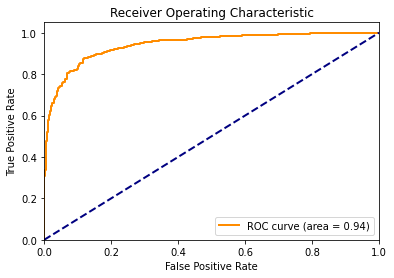

14/14 [==============================] - 16s 1s/step
Test Loss: 0.31015186565917674
Validation Loss: 0.4074554594666251
Training Time (seconds): 871.4065942764282
Inference Time (seconds): 33.95164656639099
Validation Accuracy: 0.8214285714285714
Test Accuracy: 0.8733333333333333
Confusion Matrix:
 [[399  62]
 [ 52 387]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       461
           1       0.86      0.88      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9427509771270735
Metrics saved successfully


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [26]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 79s 2s/step - loss: 0.2404 - accuracy: 0.9036 - val_loss: 0.4343 - val_accuracy: 0.8143
Epoch 2/150
53/53 [==============================] - 79s 1s/step - loss: 0.2615 - accuracy: 0.8863 - val_loss: 0.4248 - val_accuracy: 0.8333
Epoch 3/150
53/53 [==============================] - 79s 1s/step - loss: 0.2557 - accuracy: 0.8964 - val_loss: 0.4707 - val_accuracy: 0.7881
Epoch 4/150
53/53 [==============================] - 79s 2s/step - loss: 0.2636 - accuracy: 0.8869 - val_loss: 0.4609 - val_accuracy: 0.8024
Epoch 5/150
53/53 [==============================] - 79s 2s/step - loss: 0.2462 - accuracy: 0.8940 - val_loss: 0.4633 - val_accuracy: 0.8238
Epoch 6/150
53/53 [==============================] - 79s 1s/step - loss: 0.2466 - accuracy: 0.8929 - val_loss: 0.4241 - val_accuracy: 0.8333
Epoch 7/150
53/53 [==============================] - 79s 1s/step - loss: 0.2419 - accuracy: 0.9048 - val_loss: 0.4107 - val_accuracy: 0.8262
Epoch 8/150
5

29/29 [==============================] - 34s 1s/step


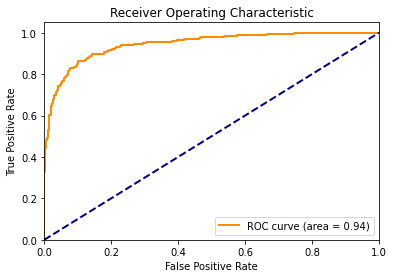

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3017788506818681
Validation Loss: 0.41066721660511174
Training Time (seconds): 950.4114651679993
Inference Time (seconds): 34.04732418060303
Validation Accuracy: 0.8261904761904761
Test Accuracy: 0.8722222222222222
Confusion Matrix:
 [[404  57]
 [ 58 381]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       461
           1       0.87      0.87      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9441789909032064
Metrics saved successfully


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [28]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])
# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 79s 2s/step - loss: 0.2454 - accuracy: 0.8970 - val_loss: 0.4387 - val_accuracy: 0.8119
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.2372 - accuracy: 0.9006 - val_loss: 0.4165 - val_accuracy: 0.8357
Epoch 3/200
53/53 [==============================] - 79s 2s/step - loss: 0.2220 - accuracy: 0.9077 - val_loss: 0.4162 - val_accuracy: 0.8143
Epoch 4/200
53/53 [==============================] - 79s 1s/step - loss: 0.2378 - accuracy: 0.9018 - val_loss: 0.4241 - val_accuracy: 0.8286
Epoch 5/200
53/53 [==============================] - 79s 2s/step - loss: 0.2365 - accuracy: 0.8988 - val_loss: 0.4322 - val_accuracy: 0.8119
Epoch 6/200
53/53 [==============================] - 79s 1s/step - loss: 0.2155 - accuracy: 0.9113 - val_loss: 0.4135 - val_accuracy: 0.8238
Epoch 7/200
53/53 [==============================] - 79s 2s/step - loss: 0.2114 - accuracy: 0.9149 - val_loss: 0.4222 - val_accuracy: 0.8214
Epoch 8/200
5

29/29 [==============================] - 34s 1s/step


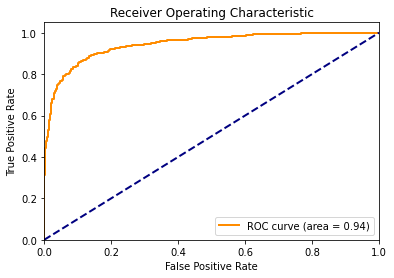

14/14 [==============================] - 16s 1s/step
Test Loss: 0.30186243360513754
Validation Loss: 0.41348508935834843
Training Time (seconds): 871.8241593837738
Inference Time (seconds): 34.06582283973694
Validation Accuracy: 0.8238095238095238
Test Accuracy: 0.8755555555555555
Confusion Matrix:
 [[406  55]
 [ 57 382]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       461
           1       0.87      0.87      0.87       439

    accuracy                           0.88       900
   macro avg       0.88      0.88      0.88       900
weighted avg       0.88      0.88      0.88       900

ROC AUC Score: 0.9438775762307353
Metrics saved successfully


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Attention Mechanism+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")

# VGG16+Capsule+Dense

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG16
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of VGG16

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add Capsule Network
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Reshape((-1, 512))(x)  # Reshape to 3D tensor for Capsule Network
x = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
x = Flatten()(x)  # Flatten the output
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=50, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/50
53/53 [==============================] - 68s 1s/step - loss: 0.6128 - accuracy: 0.6750 - val_loss: 0.5193 - val_accuracy: 0.7500
Epoch 2/50
53/53 [==============================] - 77s 1s/step - loss: 0.4361 - accuracy: 0.7935 - val_loss: 0.4069 - val_accuracy: 0.8190
Epoch 3/50
53/53 [==============================] - 79s 1s/step - loss: 0.3611 - accuracy: 0.8339 - val_loss: 0.4430 - val_accuracy: 0.7857
Epoch 4/50
53/53 [==============================] - 79s 1s/step - loss: 0.3220 - accuracy: 0.8494 - val_loss: 0.4300 - val_accuracy: 0.8048
Epoch 5/50
53/53 [==============================] - 79s 1s/step - loss: 0.3127 - accuracy: 0.8565 - val_loss: 0.4234 - val_accuracy: 0.8071
Epoch 6/50
53/53 [==============================] - 79s 1s/step - loss: 0.2871 - accuracy: 0.8673 - val_loss: 0.5063 - val_accuracy: 0.7762
Epoch 7/50
53/53 [==============================] - 79s 2s/step - loss: 0.2707 - accuracy: 0.8774 - val_loss: 0.3947 - val_accuracy: 0.8238
Epoch 8/50
53/53 [==

29/29 [==============================] - 26s 908ms/step


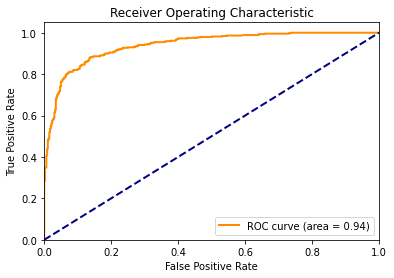

14/14 [==============================] - 14s 980ms/step
Test Loss: 0.3172544869981489
Validation Loss: 0.3883470425547671
Training Time (seconds): 1175.2085008621216
Inference Time (seconds): 26.65569305419922
Validation Accuracy: 0.8285714285714286
Test Accuracy: 0.8688888888888889
Confusion Matrix:
 [[399  62]
 [ 56 383]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       461
           1       0.86      0.87      0.87       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.9390376471867141
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_50_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_50_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=100, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/100
53/53 [==============================] - 69s 1s/step - loss: 0.6041 - accuracy: 0.6821 - val_loss: 0.4801 - val_accuracy: 0.7786
Epoch 2/100
53/53 [==============================] - 78s 1s/step - loss: 0.4395 - accuracy: 0.7982 - val_loss: 0.4094 - val_accuracy: 0.8143
Epoch 3/100
53/53 [==============================] - 80s 2s/step - loss: 0.3559 - accuracy: 0.8339 - val_loss: 0.4232 - val_accuracy: 0.8119
Epoch 4/100
53/53 [==============================] - 80s 2s/step - loss: 0.3388 - accuracy: 0.8381 - val_loss: 0.3723 - val_accuracy: 0.8238
Epoch 5/100
53/53 [==============================] - 80s 2s/step - loss: 0.2904 - accuracy: 0.8726 - val_loss: 0.3844 - val_accuracy: 0.8190
Epoch 6/100
53/53 [==============================] - 80s 2s/step - loss: 0.2884 - accuracy: 0.8649 - val_loss: 0.3913 - val_accuracy: 0.8357
Epoch 7/100
53/53 [==============================] - 80s 2s/step - loss: 0.2504 - accuracy: 0.8899 - val_loss: 0.4783 - val_accuracy: 0.7929
Epoch 8/100
5

29/29 [==============================] - 27s 926ms/step


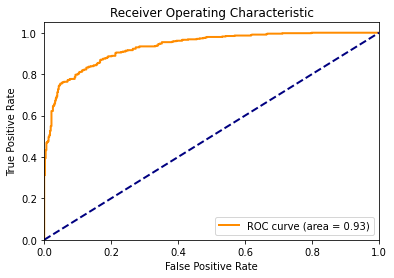

14/14 [==============================] - 14s 1s/step
Test Loss: 0.33181912251548396
Validation Loss: 0.3722764680985296
Training Time (seconds): 709.7950165271759
Inference Time (seconds): 27.299211263656616
Validation Accuracy: 0.8238095238095238
Test Accuracy: 0.8522222222222222
Confusion Matrix:
 [[400  61]
 [ 72 367]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       461
           1       0.86      0.84      0.85       439

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900

ROC AUC Score: 0.9330538247545447
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_100_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_100_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=150, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/150
53/53 [==============================] - 69s 1s/step - loss: 0.5955 - accuracy: 0.6732 - val_loss: 0.5145 - val_accuracy: 0.7333
Epoch 2/150
53/53 [==============================] - 78s 1s/step - loss: 0.4401 - accuracy: 0.7952 - val_loss: 0.4407 - val_accuracy: 0.7929
Epoch 3/150
53/53 [==============================] - 80s 2s/step - loss: 0.3827 - accuracy: 0.8208 - val_loss: 0.3923 - val_accuracy: 0.8167
Epoch 4/150
53/53 [==============================] - 80s 2s/step - loss: 0.3357 - accuracy: 0.8548 - val_loss: 0.3961 - val_accuracy: 0.8357
Epoch 5/150
53/53 [==============================] - 81s 2s/step - loss: 0.3094 - accuracy: 0.8661 - val_loss: 0.4160 - val_accuracy: 0.8190
Epoch 6/150
53/53 [==============================] - 81s 2s/step - loss: 0.2840 - accuracy: 0.8732 - val_loss: 0.4211 - val_accuracy: 0.8286
Epoch 7/150
53/53 [==============================] - 80s 2s/step - loss: 0.2695 - accuracy: 0.8875 - val_loss: 0.3840 - val_accuracy: 0.8310
Epoch 8/150
5

29/29 [==============================] - 29s 995ms/step


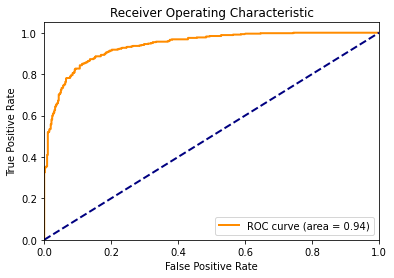

14/14 [==============================] - 16s 1s/step
Test Loss: 0.3217459789948678
Validation Loss: 0.38272893827041254
Training Time (seconds): 1031.438218832016
Inference Time (seconds): 29.111656188964844
Validation Accuracy: 0.8261904761904761
Test Accuracy: 0.8655555555555555
Confusion Matrix:
 [[396  65]
 [ 56 383]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       461
           1       0.85      0.87      0.86       439

    accuracy                           0.87       900
   macro avg       0.87      0.87      0.87       900
weighted avg       0.87      0.87      0.87       900

ROC AUC Score: 0.939225413703991
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_150_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_150_metrics.csv',index=False)
print("Metrics saved successfully")

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

import time

# Record start time
start_train_time = time.time()

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_preprocessed, y_train_encoded, batch_size=32, epochs=200, 
                    validation_data=(X_val_preprocessed, y_val_encoded), callbacks=[early_stopping])

# Record end time
end_train_time = time.time()

# Calculate training time
training_time = end_train_time - start_train_time
print("Training Time:", training_time, "seconds")


Epoch 1/200
53/53 [==============================] - 69s 1s/step - loss: 0.6015 - accuracy: 0.6696 - val_loss: 0.5262 - val_accuracy: 0.7310
Epoch 2/200
53/53 [==============================] - 79s 1s/step - loss: 0.4316 - accuracy: 0.8030 - val_loss: 0.4392 - val_accuracy: 0.7833
Epoch 3/200
53/53 [==============================] - 80s 2s/step - loss: 0.3674 - accuracy: 0.8226 - val_loss: 0.4021 - val_accuracy: 0.8214
Epoch 4/200
53/53 [==============================] - 80s 2s/step - loss: 0.3333 - accuracy: 0.8458 - val_loss: 0.4231 - val_accuracy: 0.7952
Epoch 5/200
53/53 [==============================] - 81s 2s/step - loss: 0.2987 - accuracy: 0.8679 - val_loss: 0.3790 - val_accuracy: 0.8357
Epoch 6/200
53/53 [==============================] - 81s 2s/step - loss: 0.2695 - accuracy: 0.8839 - val_loss: 0.4025 - val_accuracy: 0.8143
Epoch 7/200
53/53 [==============================] - 80s 2s/step - loss: 0.2523 - accuracy: 0.8851 - val_loss: 0.4131 - val_accuracy: 0.8214
Epoch 8/200
5

29/29 [==============================] - 27s 937ms/step


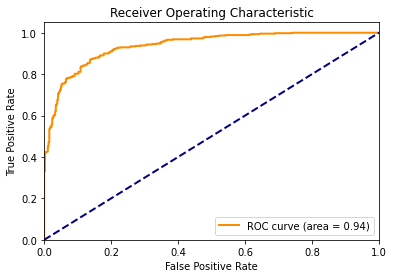

14/14 [==============================] - 14s 1s/step
Test Loss: 0.32155167798748835
Validation Loss: 0.3790224552867792
Training Time (seconds): 791.7784850597382
Inference Time (seconds): 27.61765146255493
Validation Accuracy: 0.8357142857142857
Test Accuracy: 0.86
Confusion Matrix:
 [[398  63]
 [ 63 376]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       461
           1       0.86      0.86      0.86       439

    accuracy                           0.86       900
   macro avg       0.86      0.86      0.86       900
weighted avg       0.86      0.86      0.86       900

ROC AUC Score: 0.9377578701347472
Metrics saved successfully


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Record start time
start_inference_time = time.time()

# Evaluate on test data
y_pred = model.predict(X_test_preprocessed)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Record end time
end_inference_time = time.time()

# Calculate accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_binary)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred_binary)

# Generate classification report
class_report = classification_report(y_test_encoded, y_pred_binary)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred)
roc_auc = roc_auc_score(y_test_encoded, y_pred)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Evaluate on validation data
y_val_pred = model.predict(X_val_preprocessed)
y_val_pred_binary = (y_val_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val_encoded, y_val_pred_binary)
from sklearn.metrics import log_loss
import time

# Calculate test loss
test_loss = log_loss(y_test_encoded, y_pred)

# Calculate validation loss
val_loss = log_loss(y_val_encoded, y_val_pred)

# Measure time complexity for training and inference
# Assuming you recorded the start and end times during model training and inference

# For example, if you recorded start_train_time, end_train_time, start_inference_time, and end_inference_time:
training_time = end_train_time - start_train_time
inference_time = end_inference_time - start_inference_time

# Print additional metrics
print("Test Loss:", test_loss)
print("Validation Loss:", val_loss)
print("Training Time (seconds):", training_time)
print("Inference Time (seconds):", inference_time)

# Print validation accuracy
print("Validation Accuracy:", val_accuracy)

# Print metrics
print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print("ROC AUC Score:", roc_auc)

kappa = cohen_kappa_score(y_test, y_pred_binary)
mcc = matthews_corrcoef(y_test, y_pred_binary)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_binary)
existing_metrics_df=pd.read_csv('VGG16_3000_epoch_200_metrics.csv')
metrics={
    'Combination':['VGG16+Capsule Network+Dense'],
    'Validation Accuracy':[val_accuracy*100],
    'Validation Loss':[val_loss],
    'Test Accuracy':[test_accuracy*100],
    'Test Loss':[test_loss],
    'Training time':[training_time],
    'Inference time':[inference_time],
    'Cohens Kappa':[kappa],
    'MCC':[mcc],
    'Balanced Accuracy':[balanced_accuracy]
}
new_metrics_df=pd.DataFrame(metrics)
updated_metrics_df=pd.concat([existing_metrics_df,new_metrics_df],ignore_index=True)
updated_metrics_df.to_csv('VGG16_3000_epoch_200_metrics.csv',index=False)
print("Metrics saved successfully")